In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_t = pd.read_csv('../data/raw/training_Traffic.csv')
df_s = pd.read_csv('../data/raw/training_Sales.csv')

In [3]:
# increasing max length for all columns and rows
pd.set_option('display.max_colwidth', -1)

pd.set_option('display.max_info_columns', 500)
pd.set_option('display.max_rows', 500)

In [4]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58437 entries, 0 to 58436
Data columns (total 2 columns):
Date     58437 non-null object
Value    58437 non-null int64
dtypes: int64(1), object(1)
memory usage: 913.2+ KB


In [5]:
df_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67058 entries, 0 to 67057
Data columns (total 2 columns):
Date     67058 non-null object
Value    67058 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.0+ MB


In [6]:
# convert date into datetime columns
df_t['Date'] = pd.to_datetime(df_t['Date'])
df_s['Date'] = pd.to_datetime(df_s['Date'])

In [7]:
# setting date as indexes
df_t.set_index('Date', inplace=True)
df_s.set_index('Date', inplace=True)

In [8]:
df_t.head(5)

,Value
Date,
2015-01-01 10:00:00,0
2015-01-01 10:15:00,1
2015-01-01 10:30:00,4
2015-01-01 10:45:00,3
2015-01-01 11:00:00,1


In [9]:
df_s.head(5)

,Value
Date,
2013-11-07 13:00:00,830
2013-11-07 13:15:00,885
2013-11-07 13:30:00,938
2013-11-07 13:45:00,804
2013-11-07 14:00:00,793


There are no missing values in the current datasets for the dates provided

In [10]:
# checking for missing values in traffic df
df_t.isna().sum()

Value    0
dtype: int64

In [11]:
# checking for missing values in sales df
df_s.isna().sum()

Value    0
dtype: int64

The datasets provided are too granular. Since we are interested only in predicting traffic and sales by the hour, it is possible to do some downsampling on the dates

In [12]:
# downsampling by the hour for all traffic datapoints
temp_hourly_traffic = df_t.resample('H')
df_t_h = temp_hourly_traffic.sum()

In [13]:
# downsampling by the hour for all sales datapoints
temp_hourly_sales = df_s.resample('H')
df_s_h = temp_hourly_sales.sum()

In [14]:
df_t_h.head()

,Value
Date,
2015-01-01 10:00:00,8
2015-01-01 11:00:00,14
2015-01-01 12:00:00,28
2015-01-01 13:00:00,33
2015-01-01 14:00:00,47


In [15]:
df_s_h.head(5)

,Value
Date,
2013-11-07 13:00:00,3457
2013-11-07 14:00:00,2250
2013-11-07 15:00:00,0
2013-11-07 16:00:00,729
2013-11-07 17:00:00,0


Double checking that there are no missing hours/dates

In [16]:
len(df_t_h)

29316

In [17]:
pd.period_range(start = df_t_h.index.min(), end = df_t_h.index.max(), freq = 'H')

PeriodIndex(['2015-01-01 10:00', '2015-01-01 11:00', '2015-01-01 12:00',
             '2015-01-01 13:00', '2015-01-01 14:00', '2015-01-01 15:00',
             '2015-01-01 16:00', '2015-01-01 17:00', '2015-01-01 18:00',
             '2015-01-01 19:00',
             ...
             '2018-05-06 12:00', '2018-05-06 13:00', '2018-05-06 14:00',
             '2018-05-06 15:00', '2018-05-06 16:00', '2018-05-06 17:00',
             '2018-05-06 18:00', '2018-05-06 19:00', '2018-05-06 20:00',
             '2018-05-06 21:00'],
            dtype='period[H]', length=29316, freq='H')

In [18]:
pd.period_range(start = '2015-01-01 10:00', end = '2018-05-06 21:00', freq='H')

PeriodIndex(['2015-01-01 10:00', '2015-01-01 11:00', '2015-01-01 12:00',
             '2015-01-01 13:00', '2015-01-01 14:00', '2015-01-01 15:00',
             '2015-01-01 16:00', '2015-01-01 17:00', '2015-01-01 18:00',
             '2015-01-01 19:00',
             ...
             '2018-05-06 12:00', '2018-05-06 13:00', '2018-05-06 14:00',
             '2018-05-06 15:00', '2018-05-06 16:00', '2018-05-06 17:00',
             '2018-05-06 18:00', '2018-05-06 19:00', '2018-05-06 20:00',
             '2018-05-06 21:00'],
            dtype='period[H]', length=29316, freq='H')

There are no missing hours for our traffic hourly dataframe

In [19]:
len(df_s_h)

39391

In [20]:
pd.period_range(start = df_s_h.index.min(), end = df_s_h.index.max(), freq = 'H')

PeriodIndex(['2013-11-07 13:00', '2013-11-07 14:00', '2013-11-07 15:00',
             '2013-11-07 16:00', '2013-11-07 17:00', '2013-11-07 18:00',
             '2013-11-07 19:00', '2013-11-07 20:00', '2013-11-07 21:00',
             '2013-11-07 22:00',
             ...
             '2018-05-06 10:00', '2018-05-06 11:00', '2018-05-06 12:00',
             '2018-05-06 13:00', '2018-05-06 14:00', '2018-05-06 15:00',
             '2018-05-06 16:00', '2018-05-06 17:00', '2018-05-06 18:00',
             '2018-05-06 19:00'],
            dtype='period[H]', length=39391, freq='H')

In [21]:
pd.period_range(start = '2013-11-07 13:00', end = '2018-05-06 19:00', freq='H')

PeriodIndex(['2013-11-07 13:00', '2013-11-07 14:00', '2013-11-07 15:00',
             '2013-11-07 16:00', '2013-11-07 17:00', '2013-11-07 18:00',
             '2013-11-07 19:00', '2013-11-07 20:00', '2013-11-07 21:00',
             '2013-11-07 22:00',
             ...
             '2018-05-06 10:00', '2018-05-06 11:00', '2018-05-06 12:00',
             '2018-05-06 13:00', '2018-05-06 14:00', '2018-05-06 15:00',
             '2018-05-06 16:00', '2018-05-06 17:00', '2018-05-06 18:00',
             '2018-05-06 19:00'],
            dtype='period[H]', length=39391, freq='H')

There are no missing hours for our sales hourly dataframe

# EDA Visualisation

In [74]:
# building more detailed df for traffic
df_t_h['time'] = df_t_h.index.hour
df_t_h['mdate'] = df_t_h.index.day
df_t_h['day'] = df_t_h.index.dayofweek
df_t_h['week'] = df_t_h.index.weekofyear
df_t_h['month'] = df_t_h.index.month
df_t_h['year'] = df_t_h.index.year

In [82]:
# building more detailed df ofr sales
df_s_h['time'] = df_s_h.index.hour
df_s_h['mdate'] = df_s_h.index.day
df_s_h['day'] = df_s_h.index.dayofweek
df_s_h['week'] = df_s_h.index.weekofyear
df_s_h['month'] = df_s_h.index.month
df_s_h['year'] = df_s_h.index.year

# changing cents to dollars
df_s_h['Value'] = df_s_h['Value']/100

In [83]:
# Prepare traffic data for variation by hour of the day (total)
pivothour_t = pd.pivot_table(df_t_h, values='Value', columns='day', index = 'time',
                             aggfunc=np.nanmean)



In [84]:
# Prepare sales data for variation by hour of the day (total)
pivothour_s = pd.pivot_table(df_s_h, values='Value', columns='day', index = 'time',
                             aggfunc=np.nanmean)



In [85]:
# Average traffic per month over the years
pivotmonth_t = pd.pivot_table(df_t_h.replace(0, np.nan), values='Value', columns='year', index = 'month',
                             aggfunc=np.mean)

In [86]:
pivotmonth_s = pd.pivot_table(df_s_h.replace(0, np.nan), values='Value', columns='year', index = 'month',
                             aggfunc=np.sum)


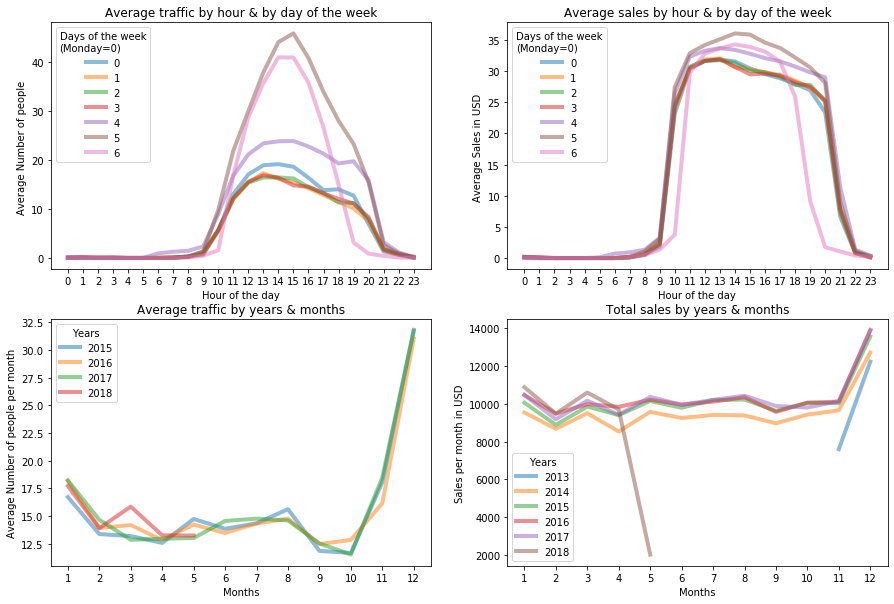

In [92]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(15,10))

ax[0,0].plot(pivothour_t, linewidth=4, alpha=0.5)
ax[0,0].set_title('Average traffic by hour & by day of the week')
ax[0,0].set_ylabel('Average Number of people ')
ax[0,0].set_xlabel('Hour of the day')
ax[0,0].set_xticks(range(0,24))
ax[0,0].legend(pivothour_t.columns.values, title='Days of the week\n(Monday=0)')

ax[0,1].plot(pivothour_s, linewidth=4, alpha=0.5)
ax[0,1].set_title('Average sales by hour & by day of the week')
ax[0,1].set_ylabel('Average Sales in USD ')
ax[0,1].set_xlabel('Hour of the day')
ax[0,1].set_xticks(range(0,24))
ax[0,1].legend(pivothour_s.columns.values, title='Days of the week\n(Monday=0)')

ax[1,0].plot(pivotmonth_t, linewidth=4, alpha=0.5)
ax[1,0].set_title('Average traffic by years & months')
ax[1,0].set_ylabel('Average Number of people per month')
ax[1,0].set_xlabel('Months')
ax[1,0].set_xticks(range(1,13))
ax[1,0].legend(pivotmonth_t.columns.values, title='Years')

ax[1,1].plot(pivotmonth_s, linewidth=4, alpha=0.5)
ax[1,1].set_title('Total sales by years & months')
ax[1,1].set_ylabel('Sales per month in USD')
ax[1,1].set_xlabel('Months')
ax[1,1].set_xticks(range(1,13))
ax[1,1].legend(pivotmonth_s.columns.values, title='Years')
plt.show()

# Time Series Decomposition and Checking For Stationarity